In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sn
import matplotlib.pyplot as plt

A car manufacturing company claims that the mileage of their new car is 25 kmph with a standard deviation of 2.5 kmph. A random sample of 45 cars was drawn and recorded their mileage as per the standard procedure. From the sample, the mean mileage was seen to be 24 kmph. Is this evidence to claim that the mean mileage is different from 25kmph? (assume normality of data)


H0: mu =25

H1: mu !=25

In [3]:
# Define alpha 
alpha= 0.05       # by default if it is not stated

In [6]:
# Test statistic ( since n > 30  and one numerical variable ---> Z test )
# z_statistic = (sample mean- hypotheis mean) /Std. error
mu= 25
xbar = 24
sigma = 2.5
n= 45
std_error = sigma/np.sqrt(n)
zstat = (xbar-mu)/std_error
z_critical = st.norm.isf(0.025)
print(abs(zstat), z_critical)

2.6832815729997477 1.9599639845400545


Decision rule for CVA : if abs ( z_stat) > abs(z_critical) ---> reject H0 else fail to reject ( accept) H0 

In [7]:
# since z_statistic >z_critical ---> reject H0; 
# the mean mileage is different from 25

In [8]:
## P-Value approach
pval = st.norm.cdf(zstat)*2
pval

0.007290358091535638

Decision rule for PVA : if p value > alpha ---> fail to reject or accept  H0 else reject H0 

In [ ]:
# pvalue (0.007)<alpha(0.05) ---> reject H0
# the mean mileage is different from 25

In [9]:
## CI approach
lci = xbar-(z_critical*std_error)
uci = xbar+(z_critical*std_error)
print( lci, uci)

23.269564549519515 24.730435450480485


Decision rule for CIA : if CI consists of hypothesis mean --> accept H0 else reject H0

In [ ]:
# sicne CI does not have hypothesis mean within its limits --> reject H0
# the mean mileage is different from 25

In [10]:
## Numerical Vs Numeriucal -- Correlation hypotheis test
var1 = np.array([9,8,7,4,9,8,6,7,8,7])
var2= np.array([7,8,6,5,8,9,5,7,8,8])

In [11]:
len(var1)

10

In [12]:
len(var2)

10

In [13]:
np.corrcoef(var1,var2)

array([[1.        , 0.74332576],
       [0.74332576, 1.        ]])

In [14]:
# H0: r= 0
# H1:  r!=0

In [16]:
test_stat, p_value = st.pearsonr(var1,var2)

In [17]:
test_stat

0.7433257644048304

In [18]:
p_value

0.013742953313573758

In [ ]:
## PVA : pvalue is <alpha(0.05)---> reject H0
## Yes, there is correlation b/w two variables 

## One sample Test of Mean

Test the claim that the perofmrance of stats marks in DS onloine class is 7 out of 10 with the below sample data:

stas_marks = np.array([9,8,7,4,9,8,6,7,8,7])

In [19]:
stat_marks = np.array([9,8,7,4,9,8,6,7,8,7])

In [20]:
## Test of Normality ( shapiro test): H0: pop Data = Nornmal; H1: Pop Data != Normal
st.shapiro(stat_marks)

ShapiroResult(statistic=0.8913360834121704, pvalue=0.17554603517055511)

In [21]:
## PVA: since pvalue (0.1755) >alpha(0.05)----> accept H0 
## pop data follows normal 
## yes we can proceed for parametric test 

In [22]:
# H0: mu_perf = 7

# H1: mu_perf !=7

In [25]:
mu=7
n=len(stat_marks)
xbar1 = np.mean(stat_marks)
sd = np.std(stat_marks,ddof=1)
se = sd/np.sqrt(n)
t_stat = (xbar1-mu)/se
pval = st.t.sf(abs(t_stat), n-1)*2
print(t_stat, pval)

0.6348110542727381 0.5413512976456856


In [27]:
st.ttest_1samp(stat_marks,mu)

Ttest_1sampResult(statistic=0.6348110542727381, pvalue=0.5413512976456856)

In [ ]:
## since pvalue is > alpha(0.05)---> accept H0.

In [28]:
xbar1

7.3

In [5]:
from statsmodels.stats import weightstats as stw

## 2 samples Independent Test

In [21]:
from sklearn  import datasets
import seaborn as sn
import pandas as pd
import numpy as np
import scipy.stats as st

In [10]:
df = sn.load_dataset('Tips')

In [11]:
df.shape

(244, 7)

In [6]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [17]:
df.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [20]:
df['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [ ]:
## Is the total bill differs from male to female?

In [ ]:
## we can do 2 samples independent test of mean/median

In [22]:
## Checking the assumptions
## 1 Test of normality
st.shapiro(df.total_bill)


ShapiroResult(statistic=0.9197188019752502, pvalue=3.3245434183371003e-10)

C:\Users\malli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

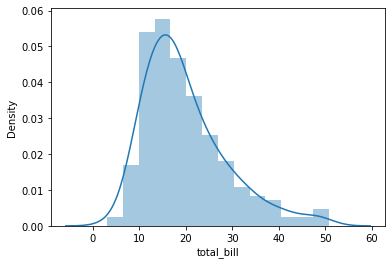

In [23]:
sn.distplot(df.total_bill)

In [56]:
mt = df[df.sex=='Male']['total_bill']
ft = df[df.sex=='Female']['total_bill']

In [57]:
st.shapiro(mt)

ShapiroResult(statistic=0.9187343120574951, pvalue=1.0275331163711598e-07)

In [58]:
st.shapiro(ft)

ShapiroResult(statistic=0.9188763499259949, pvalue=4.211670238873921e-05)

In [59]:
## Test of normality fails( by default alpha = 0.05) : both populations( male total bill and female total bill )are not 
## following normal distribution

In [60]:
## since normality test failed, go for non parametric test
## HO :pop_median_male total bill = pop_median_female total bill
## H1: pop_median_male total bill != pop_median_female total bill


In [61]:
alpha =0.05
## equvivalent non parametric for 2 samples independent parametric test is Mann Whitney U test

st.mannwhitneyu(mt,ft)

MannwhitneyuResult(statistic=5613.5, pvalue=0.010675166043993559)

In [62]:
## pvalue (0.01)<0.05 --> reject Ho.
## we can conclude that the pop median  of total bill differs from male to female 

In [63]:
## Note: to explain paramtric test we are assuming the following

In [64]:
## Assume pop data has satisfied the assumption of normality

In [65]:
## Assumption of variance equality ( Levene Test)
## Levene test: H0: Pop1_var = pop2_var=pop3_var; H1: any two pop variances are not equal
st.levene(mt,ft)

LeveneResult(statistic=1.631715567905501, pvalue=0.20269005267784254)

In [66]:
## Since p value > 0.05 --> accept H0 
## Hence the pop_var of femaltotal bill and male total bill are same

In [67]:
## H0: mt_popmean = ft_pop mean
## H1: mt_popmean!= ft_popmean

In [68]:
print(mt.var(),ft.var())

85.4971845582231 64.14742862870891


In [69]:
len(mt)

157

In [70]:
len(ft)

87

In [117]:
## 2 samples independent Z test
mtbar = mt.mean()
ftbar= ft.mean()
n1= len(mt)
n2= len(ft)
mts1= np.std(mt,ddof=1)
fts1= np.std(ft,ddof=1)
pooled_var = ((n1-1)*(mts1**2)+(n2-1)*(fts1**2))/(n1+n2-2)
ster = np.sqrt(pooled_var*((1/n1)+(1/n2)))
z_st = (mtbar-ftbar)/ster
pvalue = st.norm.sf(abs(z_st))*2
print(z_st, pvalue)                    

2.277794028980326 0.022738852255485113


In [114]:
stw.ztest(mt,ft,0)

(2.2777940289803134, 0.02273885225548586)

In [120]:
## 2 sample independent t test
mtbar = mt.mean()
ftbar= ft.mean()
n1= len(mt)
n2= len(ft)
mts1= np.std(mt,ddof=1)
fts1= np.std(ft,ddof=1)
pooled_var = ((n1-1)*(mts1**2)+(n2-1)*(fts1**2))/(n1+n2-2)
ster = np.sqrt(pooled_var*((1/n1)+(1/n2)))
tst =  (mtbar-ftbar)/ster
pvalue = st.t.sf(abs(tst),n1+n2-1)*2
print(tst, pvalue)

2.277794028980326 0.02360805549120447


In [113]:
st.ttest_ind(mt,ft)

Ttest_indResult(statistic=2.2777940289803134, pvalue=0.0236116668468594)

## Paired t test

In [ ]:
## Is training effective in improving the performance of the students with the below sample data?

In [86]:
marks_before = np.array([5,6,7,4,6,7,5,6,6,4])
marks_after= np.array([7,9,8,5,9,4,8,9,8,7])

In [ ]:
diff = marks_after-marks_before

In [88]:
st.shapiro(diff)

ShapiroResult(statistic=0.6966150999069214, pvalue=0.0008015500498004258)

In [ ]:
## diff is not following normal dist --> do non parametric test

In [ ]:
## H0:pop_median of diff = 0; pop_median of marks before = pop_median _marks after
## H1: pop_median of diff !=0; pop_median of marks before != pop_median _marks after


In [89]:
st.wilcoxon(marks_after,marks_before)

WilcoxonResult(statistic=7.5, pvalue=0.048828125)

In [ ]:
## Pvalue < alpha(0.05)----> reject H0

In [96]:
marks_before = np.array([5,6,4,5,6,3,5,6,5,4])
marks_after= np.array([7,9,8,6,9,5,8,9,8,7])

In [97]:
diff = marks_after-marks_before

In [98]:
st.shapiro(diff)

ShapiroResult(statistic=0.8406219482421875, pvalue=0.04488781467080116)

In [ ]:
## Note: difference follows normal distribution
## Do parametric

In [ ]:
## H0:pop_mean of diff = 0; pop_mean of marks before = pop_mean _marks after
## H1: pop_mean of diff !=0; pop_mean of marks before != pop_mean _marks after


In [104]:
st.ttest_rel(marks_after,marks_before)

Ttest_relResult(statistic=10.370987274564575, pvalue=2.640206722397805e-06)

In [105]:
mu_diff =0
dbar = diff.mean()
sd = diff.std(ddof=1)
n= len(diff)
std_er = sd/np.sqrt(n)
t_stat = (dbar-mu_diff)/std_er
pval = st.t.sf(abs(t_stat), (n-1))*2
print(t_stat, pval)

10.370987274564575 2.640206722397805e-06


In [87]:
diff = marks_after-marks_before

## one sample proportion test

## 2 samples proportion test

## Chi square Test ( Test of Association)

## Chi Square Test( Goodness of fit )

## Anova ( One way Anova)